# 정규화 모델
> 일반적으로 샘플 수가 변수 갯수보다 적거나 크게 많지 않다면 회귀모델은 **과적합(overfitting)** 되는 경향이 있습니다.  
회귀모델은 종속변수와 큰 관계가 없는 변수를 없애 주지 못함(수작업 필요).   
이를 해결하기 위하여 설명 변수가 너무 많으면 정규화(규제)를 통해 이를 해결합니다.  
최소자승법은 $\beta_i = 0$을 만들어주지 못함.  

### 과적합(overfitting)  
> 학습 데이터로 학습한 모델의 테스트 데이터 예측 성능이 떨어지는 경우  
모델이 일반화를 잘 못 시키는 상태. 실제 데이터 예측을 잘 못한다고 해석이 가능합니다.

<img src="./image/16.png">

### Lasso 모델
기존 회귀모델의 비용함수에 설명변수의 베타 절대값의 합 $\lambda\sum_{j=1}^p\left\vert\beta_j\right\vert$를 패널티 식으로 추가.
$$J = \sum_{i=1}^n{(y_i - \hat y_i)^2} + \lambda\sum_{j=1}^p\left\vert\beta_j\right\vert$$  

> $n$ : 샘플갯수  
> $p$ : 설명변수갯수  

모델이 최적화 과정을 거치면서 비용함수의 최소값이 패널티 영역과 만나는 지점에서 정규화 모델의 최적이 이루어집니다.  
회귀모델의 오차와 베타 절대값합에 해당하는 값을 동시에 최소화 시키는 방법으로 학습을 진행합니다.  
불필요하게 설명변수의 갯수가 많을 경우 **회귀계수의 크기를 0으로 만들면서** 최적을 찾아갑니다.  
많은 변수에 큰 패널티를 주며 독립변수의 갯수가 ridge 모델보다 상대적으로 많은 경우 Lasso 모델을 사용합니다.
<img src="./image/17.png">

### Ridge 모델
기존 회귀모델의 비용함수에 설명변수의 베타의 제곱 합을 패널티로 $\lambda\sum_{j=1}^p\beta_j^2$를 패널티 식으로 추가
$$ J = \sum_{i=1}^n{(y_i - \hat y_i)^2} + \lambda\sum_{j=1}^p\beta_j^2$$  

> $n$ : 샘플갯수  
> $p$ : 설명변수갯수  

회귀모델의 오차와 베타 제곱합에 해당하는 값을 동시에 최소화 시키면서 학습을 진행합니다.  
불필요하게 과대계상 된 변수의 **회귀계수의 크기를 감소**시키는 방법으로 학습을 진행합니다.    
많은 변수에 패널티를 주며 독립변수의 갯수가 Lasso 모델보다 상대적으로 작은 경우 Ridge 모델을 사용합니다.
<img src="./image/18.png">

### 정규화 모델 실습

In [7]:
# 모델 import
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### Ridge model

In [4]:
# boston 데이터 확인
df = pd.read_csv('./data/boston.csv')

In [5]:
# 타겟데이터 분할
y = df['y']
X = df.drop('y', axis=1)

In [8]:
# 훈련셋과 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# 모델 정의
rg = Ridge(alpha=5)

In [16]:
# 모델 학습
rg.fit(X_train, y_train)

Ridge(alpha=5)

In [17]:
# 모델 예측
rg_pred = rg.predict(X_test)

In [18]:
# 모델 평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f'R2 score : {r2_score(y_test, rg_pred)}')
print(f'RMSE : {mean_squared_error(y_test, rg_pred, squared=False)}') # squared=False 루트 적용한 값
print(f'MAE : {mean_absolute_error(y_test, rg_pred)}')

R2 score : 0.6970172810260666
RMSE : 4.751439812763801
MAE : 3.2272757597567026


In [ ]:
'''alpha=1
R2 score : 0.7041586727559439
RMSE : 4.695109486461522
MAE : 3.178539076034555

linear
R2 score : 0.7112260057484923
RMSE : 4.638689926172829
MAE : 3.1627098714574156
'''

In [19]:
# 모델 계수 확인
rg.coef_

array([-1.26093621e-01,  3.84496078e-02, -3.52428315e-03,  2.48328811e+00,
       -2.63644921e+00,  3.94725485e+00, -2.04404210e-02, -1.19534261e+00,
        2.20195971e-01, -1.00814175e-02, -7.77347297e-01,  1.21414506e-02,
       -5.85035620e-01])

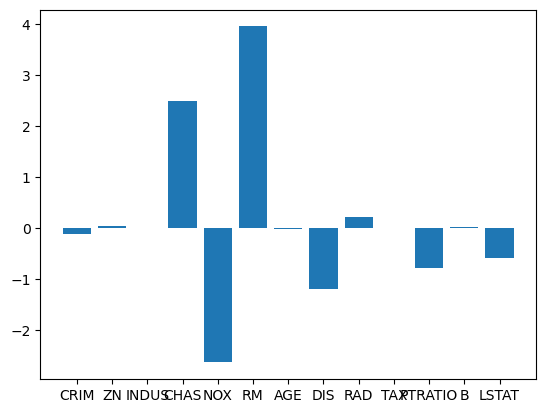

In [21]:
# 기존모델에서의 회귀계수 와 ridge모델 계수 플로팅
import matplotlib.pyplot as plt
# plt.bar(X_train.columns, lr.coef_) # 막대그래프 x, y 순서대로 전달
plt.bar(X_train.columns, rg.coef_) # 막대그래프 x, y 순서대로 전달
plt.show()